In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_squared_error

import pickle

In [6]:
train = pd.read_csv('treated_train.csv')

In [7]:
pd.set_option('display.max_columns',100)

In [8]:
train.head(10)

,Duration_in_mins,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.034111,4,3897,0.875000,0.181818,0.956522,0.363636,0.043478,0.181818,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0.132855,1,7662,0.083333,0.000000,0.217391,0.909091,0.565217,0.272727,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0.382406,1,13882,0.125000,0.727273,0.391304,0.454545,0.173913,0.454545,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0.089767,0,6218,0.083333,1.000000,0.782609,0.090909,1.000000,0.545455,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0.075404,0,13302,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,0.025135,4,3873,0.875000,0.454545,0.391304,0.000000,0.478261,0.454545,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
6,0.307002,0,11087,0.000000,1.000000,0.782609,1.000000,0.434783,0.454545,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7,0.427289,0,22270,0.000000,0.000000,0.347826,0.000000,0.217391,0.090909,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8,0.522442,0,11087,0.000000,1.000000,0.347826,1.000000,0.434783,0.454545,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9,0.141831,0,8625,1.000000,0.363636,0.478261,0.454545,0.826087,0.272727,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [9]:
train.shape

(10682, 32)

In [10]:
# Function to fit model on data and predict price
def fit_predict(train,model):
    X = train.drop('Price',axis=1)
    y = train['Price']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print("R2 Score = {0} \n Mse = {1} \n Rmse = {2}".format(r2,mse,rmse))
    sns.distplot(y_test-y_pred)

In [11]:
X = train.drop('Price',axis=1)
y = train["Price"]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
linear = LinearRegression()

R2 Score = 0.5505596392764738 
 Mse = 9703402.099219969 
 Rmse = 3115.028426711379


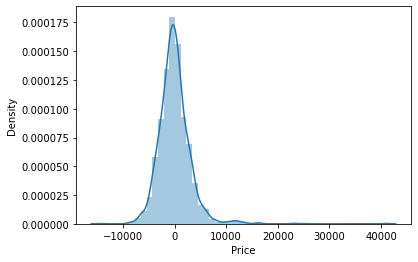

In [14]:
fit_predict(train,linear)

In [15]:
lasso = Lasso()

R2 Score = 0.5515349598167962 
 Mse = 9682344.961932294 
 Rmse = 3111.646664056235


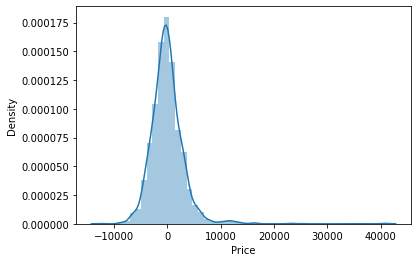

In [16]:
fit_predict(train,lasso)

In [17]:
ridge = Ridge()

R2 Score = 0.5540456956046226 
 Mse = 9628138.261681875 
 Rmse = 3102.924146942989


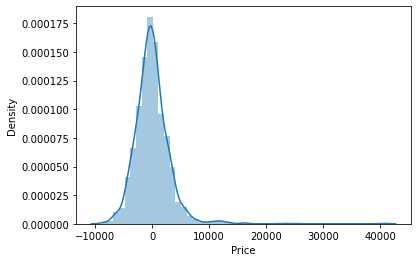

In [18]:
fit_predict(train,ridge)

In [19]:
dt = DecisionTreeRegressor(random_state=0)

R2 Score = 0.6560515283959345 
 Mse = 7425835.801692581 
 Rmse = 2725.0386789351414


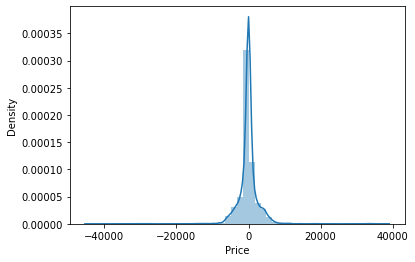

In [20]:
fit_predict(train,dt)

In [21]:
rf = RandomForestRegressor(random_state=0)

R2 Score = 0.8026213130509842 
 Mse = 4261399.136915801 
 Rmse = 2064.3156582547645


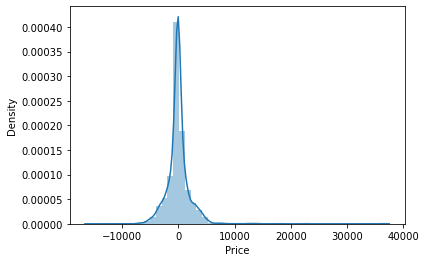

In [22]:
fit_predict(train,rf)

In [23]:
ada = AdaBoostRegressor(random_state=100)

R2 Score = 0.2625351791066759 
 Mse = 15921840.39643723 
 Rmse = 3990.2180888313897


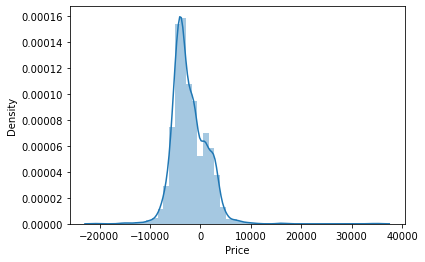

In [24]:
fit_predict(train,ada)

In [25]:
gb = GradientBoostingRegressor(random_state=100)

R2 Score = 0.7553927200295188 
 Mse = 5281062.853654411 
 Rmse = 2298.0563208186195


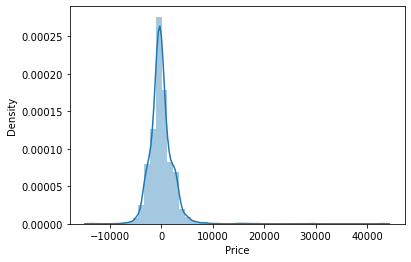

In [26]:
fit_predict(train,gb)

In [27]:
xgb = XGBRegressor(random_state=0)

[23:14:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score = 0.7516563569056224 
 Mse = 5361730.806397907 
 Rmse = 2315.541147636532


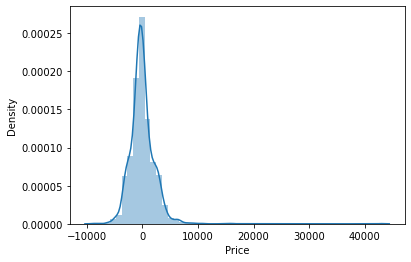

In [28]:
fit_predict(train,xgb)

In [ ]:
# As RandomForest gave the best r2 score(0.8026213130509842),we will proceed with RandomForest for randomsearch 
# and gridsearch cv

In [ ]:
n_estimators=100,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,

In [29]:
params = {
    'n_estimators':[180,190,195,200],
    'max_depth' : [19,20,21,25,28],
    'min_samples_split':[7,8,9],
    'min_samples_leaf':[1,2]
}

In [14]:
# RandomSearch CV

In [30]:
rf = RandomForestRegressor(random_state=100)

In [31]:
random = RandomizedSearchCV(estimator=rf,param_distributions=params,cv=3,verbose=2,n_jobs=-1)

In [32]:
random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   25.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [33]:
random.best_params_

{'n_estimators': 195,
 'min_samples_split': 9,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [34]:
rf = RandomForestRegressor(random_state=100,n_estimators=195,max_depth=20,min_samples_split=9,min_samples_leaf=1,
                          bootstrap=True)

R2 Score = 0.826584560971167 
 Mse = 3744033.429486896 
 Rmse = 1934.9504979422331


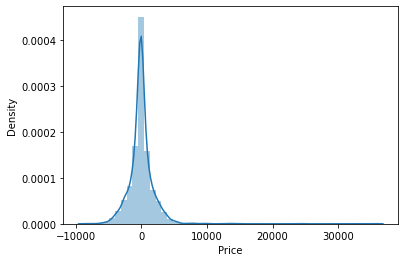

In [35]:
fit_predict(train,rf)

In [38]:
mean = random.cv_results_['mean_test_score']
std = random.cv_results_['std_test_score']
params = random.cv_results_['params']
for m,s,p in zip(mean,std,params):
    print(m,s,p)

0.7932401578582189 0.01789207830395749 {'n_estimators': 180, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_depth': 19}
0.792788332863572 0.017961902404715156 {'n_estimators': 180, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_depth': 28}
0.8086026478495157 0.01901668943968256 {'n_estimators': 195, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_depth': 20}
0.808239795809869 0.018675609689339658 {'n_estimators': 180, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_depth': 21}
0.793225028331825 0.017861666745629952 {'n_estimators': 180, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_depth': 20}
0.7937676536670589 0.017803783380072824 {'n_estimators': 200, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_depth': 20}
0.8080157875928803 0.018491499582158077 {'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 21}
0.8090340928527677 0.01866237065848636 {'n_estimators': 195, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_depth': 20

In [ ]:
# Grid Search

In [50]:
params = {
    'n_estimators':[180,190,200,250,300],
    'max_depth' : [15,20,25,28],
    'min_samples_split':[7,8,9,10,11],
    'min_samples_leaf':[1,2]
}

In [51]:
rf = RandomForestRegressor(random_state=100)

In [52]:
grid = GridSearchCV(estimator=rf,param_grid=params,n_jobs=-1,cv=3,verbose=2)

In [53]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 10.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=100,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [54]:
grid.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 300}

In [59]:
rf = RandomForestRegressor(random_state=100,n_estimators=300,max_depth=15,min_samples_split=8,min_samples_leaf=1)

R2 Score = 0.8288558181826117 
 Mse = 3694997.0635541123 
 Rmse = 1922.2375148649328


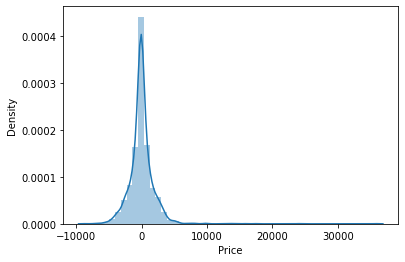

In [60]:
fit_predict(train,rf)

In [61]:
rf = RandomForestRegressor(random_state=100,n_estimators=300,max_depth=15,min_samples_split=8,min_samples_leaf=1)

R2 Score = 0.8288558181826117 
 Mse = 3694997.0635541123 
 Rmse = 1922.2375148649328


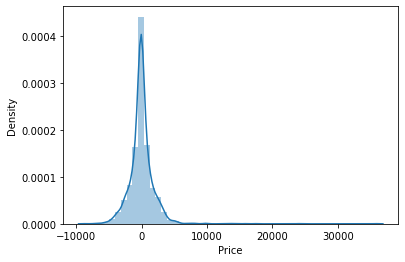

In [62]:
fit_predict(train,rf)

In [69]:
# Save model to reuse

In [65]:
file = open('rf_flight.pkl', 'wb')
pickle.dump(rf,file)

In [66]:
file = open('rf_flight.pkl','rb')
model = pickle.load(file)

In [68]:
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.8288558181826117